# Debug Data Visualization

This notebook visualizes the debug data saved in `debug_data.npz`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde


In [2]:
# Load the debug data
data = np.load('debug_data.npz')

# Print available keys
print("Available data keys:")
for key in data.keys():
    print(f"- {key}: shape {data[key].shape}")

Available data keys:
- dx: shape (3600,)
- dy: shape (3600,)
- source_charges: shape (3600,)
- target_charges: shape (3600,)
- msgs_to_compare: shape (3600, 2)
- distances: shape (3600,)
- edge_index: shape (2, 3600)
- positions: shape (1200, 2)


## 1. Edge Direction Distribution

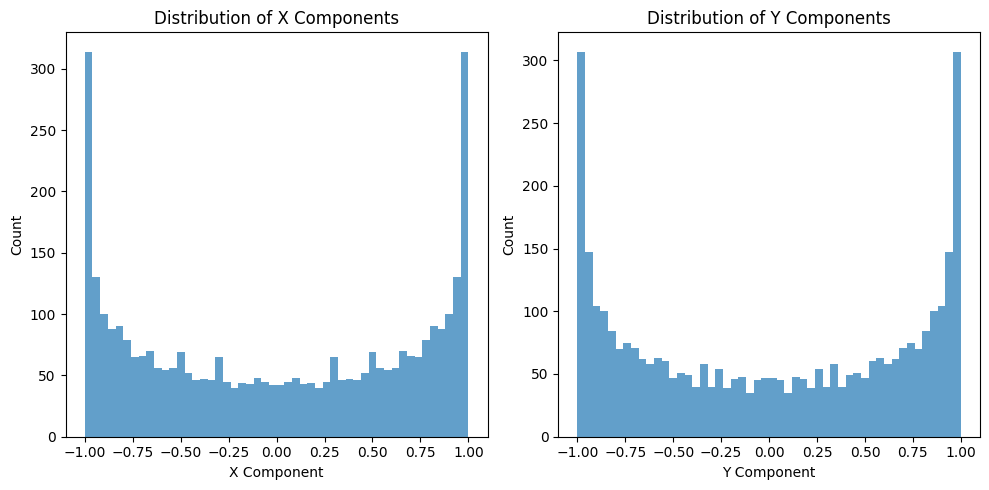

In [3]:
plt.figure(figsize=(10, 5))

# Plot x and y components of edge directions
plt.subplot(1, 2, 1)
plt.hist(data['dx'], bins=50, alpha=0.7)
plt.title('Distribution of X Components')
plt.xlabel('X Component')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(data['dy'], bins=50, alpha=0.7)
plt.title('Distribution of Y Components')
plt.xlabel('Y Component')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## 2. Message Components vs Forces

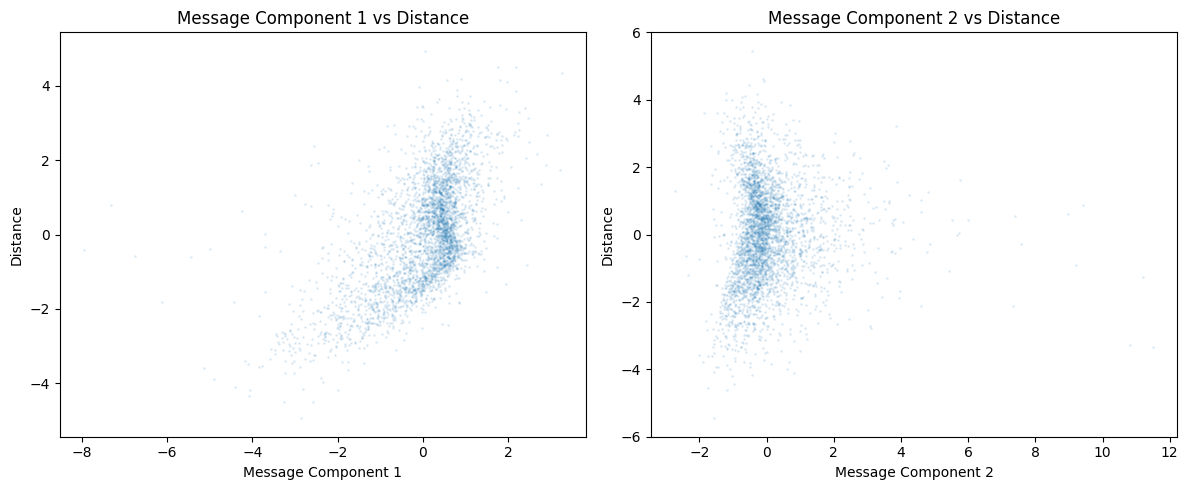

In [34]:
from scipy.optimize import minimize
plt.figure(figsize=(12, 5))

from numpy.linalg import norm

dx = data["dx"]
dy = data["dy"]


for i in range(2):
    plt.subplot(1, 2, i+1)
    
    # Calculate 2D histogram
    x = data['msgs_to_compare'][:, i]
    if i == 0:
        y = data['dx']*data['distances']
    else:
        y = data['dy']*data['distances']

    # Create scatter plot with density
    plt.scatter(x, y, alpha=0.1, s=1)
    
    plt.title(f'Message Component {i+1} vs Distance')
    plt.xlabel(f'Message Component {i+1}')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

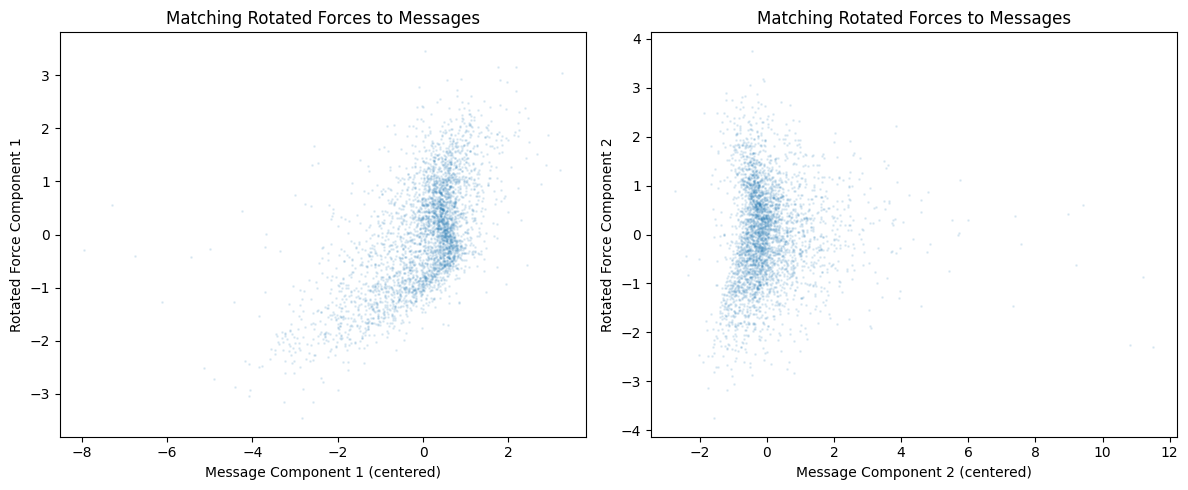

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes

# 1. Load vectors
dx = data["dx"]*data['distances']
dy = data["dy"]*data['distances']
msgs = data["msgs_to_compare"]

# 2. Normalize expected forces to unit vectors
# norms = np.sqrt(dx**2 + dy**2)
forces = np.stack([dx, dy], axis=1)

# 3. Mean center both datasets (remove offset)
forces_centered = (forces - np.mean(forces, axis=0))/np.std(forces, axis=0)
msgs_centered = (msgs - np.mean(msgs, axis=0))/np.std(msgs, axis=0)

# 4. Use orthogonal Procrustes to find best rotation matrix
R, _ = orthogonal_procrustes(forces_centered, msgs_centered)

# 5. Apply rotation to forces
# rotated_forces = forces_centered @ R
rotated_forces = forces_centered

# 6. Plot comparison
plt.figure(figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.scatter(msgs_centered[:, i], rotated_forces[:, i], alpha=0.1, s=1)
    plt.xlabel(f'Message Component {i+1} (centered)')
    plt.ylabel(f'Rotated Force Component {i+1}')
    plt.title(f'Matching Rotated Forces to Messages')
plt.tight_layout()
plt.show()


## 3. Charge Distribution

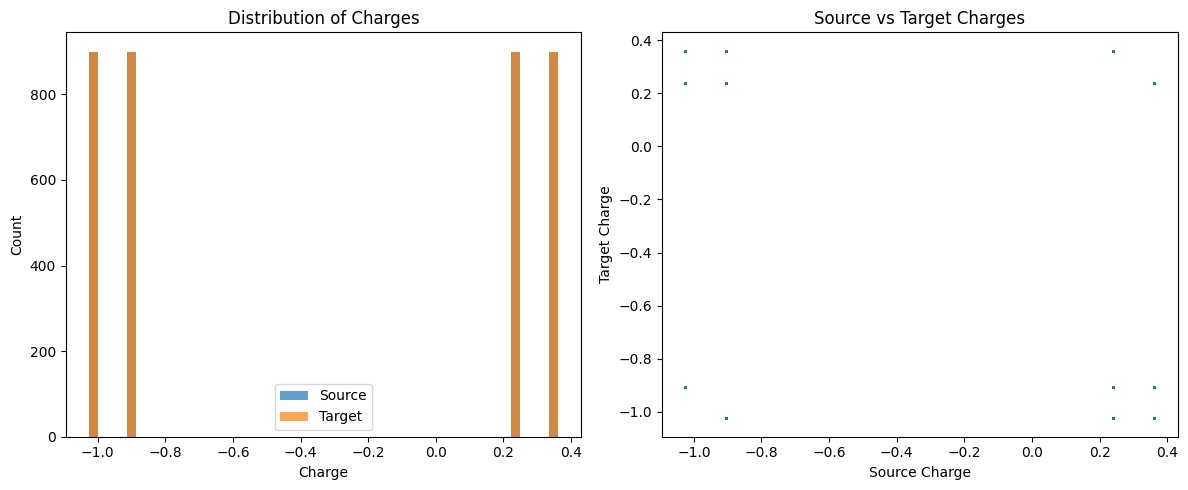

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['source_charges'], bins=50, alpha=0.7, label='Source')
plt.hist(data['target_charges'], bins=50, alpha=0.7, label='Target')
plt.title('Distribution of Charges')
plt.xlabel('Charge')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['source_charges'], data['target_charges'], alpha=0.1, s=1)
plt.title('Source vs Target Charges')
plt.xlabel('Source Charge')
plt.ylabel('Target Charge')

plt.tight_layout()
plt.show()

## 4. Node Positions Visualization

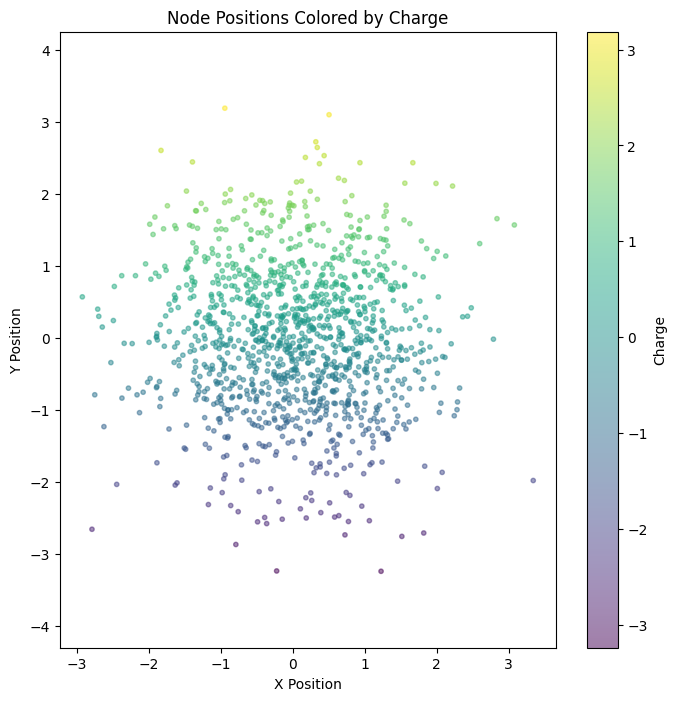

In [6]:
plt.figure(figsize=(8, 8))

# Plot node positions
plt.scatter(data['positions'][:, 0], data['positions'][:, 1], 
            alpha=0.5, s=10, c=data['positions'][:, -1], cmap='viridis')
plt.colorbar(label='Charge')
plt.title('Node Positions Colored by Charge')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.show()

## 5. Distance Distribution

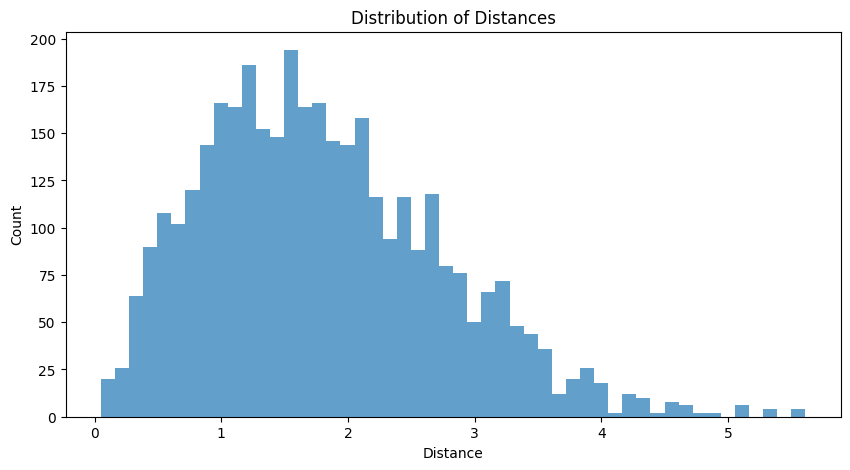

In [7]:
plt.figure(figsize=(10, 5))

plt.hist(data['distances'], bins=50, alpha=0.7)
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()